In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import os

Matplotlib is building the font cache; this may take a moment.


Loading Images......


C:\Users\Kiran\anaconda3\envs\tf\lib\site-packages\PIL\Image.py:952: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
C:\Users\Kiran\anaconda3\envs\tf\lib\site-packages\keras_applications\mobilenet_v2.py:294: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


9412608/9406464 [==============================] - 9s 1us/step
Model is getting Ready...
Training Second Model....
  ...
    to  
  ['...']
Train for 47 steps, validate on 767 samples
Epoch 1/30
47/47 [==============================] - 576s 12s/step - loss: 1.4354 - accuracy: 0.6186 - val_loss: 0.6167 - val_accuracy: 0.7116
Epoch 2/30
47/47 [==============================] - 557s 12s/step - loss: 0.5815 - accuracy: 0.7535 - val_loss: 0.4523 - val_accuracy: 0.7884
Epoch 3/30
47/47 [==============================] - 547s 12s/step - loss: 0.4123 - accuracy: 0.8251 - val_loss: 0.4236 - val_accuracy: 0.8168
Epoch 4/30
47/47 [==============================] - 546s 12s/step - loss: 0.3321 - accuracy: 0.8544 - val_loss: 0.6345 - val_accuracy: 0.7713
Epoch 5/30
47/47 [==============================] - 544s 12s/step - loss: 0.2962 - accuracy: 0.8754 - val_loss: 0.4437 - val_accuracy: 0.8295
Epoch 6/30
47/47 [==============================] - 551s 12s/step - loss: 0.2510 - accuracy: 0.8967 - val_

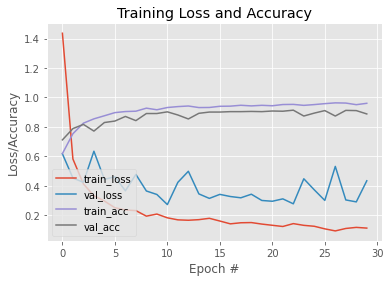

In [2]:
INIT_LR=1e-4
Epoch=30
DIRECTORIES =r"C:\Users\Kiran\Documents\Face-Mask-Detection-master\Face-Mask-Detection-master\dataset"
CATEGORIES=["with_mask","without_mask"]
BS=64
print("Loading Images......")
data=[]
labels=[]
for category in CATEGORIES:
    path=os.path.join(DIRECTORIES,category)
    for img in os.listdir(path):
        img_path=os.path.join(path,img)
        image=load_img(img_path,target_size=(224,224))
        image=img_to_array(image)
        image=preprocess_input(image)
        data.append(image)
        labels.append(category)
lb=LabelBinarizer()
labels=lb.fit_transform(labels)
labels=to_categorical(labels)

data=np.array(data,dtype="float32")
labels=np.array(labels)

(trainX,testX,trainY,testY)=train_test_split(data,labels,test_size=0.20,stratify=labels,random_state=50)

augmented=ImageDataGenerator(
            rotation_range=30,
            zoom_range=0.2,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.15,
            horizontal_flip=True,
            fill_mode="nearest")
first_model=MobileNetV2(weights="imagenet",include_top=False,input_tensor=Input(shape=(224,224,3)))
second_model=first_model.output
second_model=MaxPooling2D(pool_size=(5,5))(second_model)
second_model=Flatten(name="flatten")(second_model)
second_model=Dense(256,activation="relu")(second_model)
second_model=Dense(128,activation="relu")(second_model)
second_model=Dropout(0.5)(second_model)
second_model=Dense(2,activation="softmax")(second_model)

model=Model(inputs=first_model.input,outputs=second_model)

for layer in first_model.layers:
    layer.trainable=False
    
print("Model is getting Ready...")
opt=Adam(lr=INIT_LR,decay=INIT_LR/Epoch)
model.compile(loss="binary_crossentropy",optimizer=opt,metrics=["accuracy"])

print("Training Second Model....")
H = model.fit(
    augmented.flow(trainX, trainY, batch_size=BS),
    steps_per_epoch=len(trainX) // BS,
    validation_data=(testX, testY),
    validation_steps=len(testX) // BS,
    epochs=Epoch)

print("Running the Network....")
pred1=model.predict(testX,batch_size=BS)
pred1 = np.argmax(pred1, axis=1)

# show a nicely formatted classification report
print(classification_report(testY.argmax(axis=1), pred1,
    target_names=lb.classes_))

# serialize the model to disk
print("[INFO] saving mask detector model...")
model.save("mask_detector.model", save_format="h5")

# plot the training loss and accuracy
N = Epoch
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")

In [4]:
pip install sklearn


  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1321 sha256=5ff9029f0f4e46647df6dd802a061d64757bc0a24d74ac4efc845c10c949709b
  Stored in directory: c:\users\kiran\appdata\local\pip\cache\wheels\46\ef\c3\157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install imutils

  Created wheel for imutils: filename=imutils-0.5.3-py3-none-any.whl size=25855 sha256=81c2c6a0d38559ad9f14ab5b7d4358b3bdb8dfceddbb70f43b2550148d727262
  Stored in directory: c:\users\kiran\appdata\local\pip\cache\wheels\fc\9c\6d\1826267c72afa51b564c9c6e0f66abc806879338bc593a2270
Successfully built imutils



In [4]:
pip install os

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os


In [2]:
pip install opencv-contrib-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
from imutils.video import VideoStream
import numpy as np
import imutils
import time
import cv2
import os

def detect_and_predict_mask(frame, faceNet, maskNet):
	# grab the dimensions of the frame and then construct a blob
	# from it
	(h, w) = frame.shape[:2]
	blob = cv2.dnn.blobFromImage(frame, 1.0, (224, 224),
		(104.0, 177.0, 123.0))

	# pass the blob through the network and obtain the face detections
	faceNet.setInput(blob)
	detections = faceNet.forward()
	print(detections.shape)

	# initialize our list of faces, their corresponding locations,
	# and the list of predictions from our face mask network
	faces = []
	locs = []
	preds = []

	# loop over the detections
	for i in range(0, detections.shape[2]):
		# extract the confidence (i.e., probability) associated with
		# the detection
		confidence = detections[0, 0, i, 2]

		# filter out weak detections by ensuring the confidence is
		# greater than the minimum confidence
		if confidence > 0.5:
			# compute the (x, y)-coordinates of the bounding box for
			# the object
			box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
			(startX, startY, endX, endY) = box.astype("int")

			# ensure the bounding boxes fall within the dimensions of
			# the frame
			(startX, startY) = (max(0, startX), max(0, startY))
			(endX, endY) = (min(w - 1, endX), min(h - 1, endY))

			# extract the face ROI, convert it from BGR to RGB channel
			# ordering, resize it to 224x224, and preprocess it
			face = frame[startY:endY, startX:endX]
			face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
			face = cv2.resize(face, (224, 224))
			face = img_to_array(face)
			face = preprocess_input(face)

			# add the face and bounding boxes to their respective
			# lists
			faces.append(face)
			locs.append((startX, startY, endX, endY))

	# only make a predictions if at least one face was detected
	if len(faces) > 0:
		# for faster inference we'll make batch predictions on *all*
		# faces at the same time rather than one-by-one predictions
		# in the above `for` loop
		faces = np.array(faces, dtype="float32")
		preds = maskNet.predict(faces, batch_size=32)

	# return a 2-tuple of the face locations and their corresponding
	# locations
	return (locs, preds)

# load our serialized face detector model from disk
prototxtPath = r"C:\Users\Kiran\Documents\Face-Mask-Detection-master\Face-Mask-Detection-master\face_detector\deploy.prototxt"
weightsPath = r"C:\Users\Kiran\Documents\Face-Mask-Detection-master\Face-Mask-Detection-master\face_detector\res10_300x300_ssd_iter_140000.caffemodel"
faceNet = cv2.dnn.readNet(prototxtPath, weightsPath)

# load the face mask detector model from disk
maskNet = load_model("mask_detector.model")

# initialize the video stream
print("[INFO] starting video stream...")
vs = VideoStream(src=0).start()

# loop over the frames from the video stream
while True:
	# grab the frame from the threaded video stream and resize it
	# to have a maximum width of 400 pixels
	frame = vs.read()
	frame = imutils.resize(frame, width=400)

	# detect faces in the frame and determine if they are wearing a
	# face mask or not
	(locs, preds) = detect_and_predict_mask(frame, faceNet, maskNet)

	# loop over the detected face locations and their corresponding
	# locations
	for (box, pred) in zip(locs, preds):
		# unpack the bounding box and predictions
		(startX, startY, endX, endY) = box
		(mask, withoutMask) = pred

		# determine the class label and color we'll use to draw
		# the bounding box and text
		label = "Mask" if mask > withoutMask else "No Mask"
		color = (0, 255, 0) if label == "Mask" else (0, 0, 255)

		# include the probability in the label
		label = "{}: {:.2f}%".format(label, max(mask, withoutMask) * 100)

		# display the label and bounding box rectangle on the output
		# frame
		cv2.putText(frame, label, (startX, startY - 10),
			cv2.FONT_HERSHEY_SIMPLEX, 0.45, color, 2)
		cv2.rectangle(frame, (startX, startY), (endX, endY), color, 2)

	# show the output frame
	cv2.imshow("Frame", frame)
	key = cv2.waitKey(1) & 0xFF

	# if the `q` key was pressed, break from the loop
	if key == ord("q"):
		break

# do a bit of cleanup
cv2.destroyAllWindows()
vs.stop()
